In [2]:
'''
   So let's state the MDP:
   
   State(S) : 
       Defined as (timeStamp, cashOnHold, assetOnHold)
       timeStamp goes from (0 to Total Episode Length)
       -> In this question, the horizon H is given to be 10
       
       cashOnHold >= 0 and assetOnHold >= 0
       
       Initial State : ( 0, 20, 0 )
          cashOnHold at time t0 = 20
          assetOnHold at time t0 = 0
          
  Actions(A) :
     Sell 2, Sell 1, Hold, Buy 1, Buy 2
     :: in code will denote corresponding actions from -2 to +2
  
  Given Path :
      P0,…,P9=[1,3,5,5,4,3,2,3,5,8] 
      
  TransistionModel(T):
    Given state (timeStamp, cashOnHold, assetOnHold)
    1. Performs Action(-2):
    2. Performs Action(-1):
    3. Performs Action(0):
    4. Performs Action(1):
    5. Performs Action(2):
  
  Reward : episodic -> no intermediate rewards -> only gets to know at the final timeStamp
'''
print("Setting up environment for portfolio analysis!!")

Setting up environment for portfolio analysis!!


In [3]:
import numpy as np
import itertools
from collections import deque
import matplotlib.pyplot as plt
from scipy.stats import mode
import sys
import copy
import time
import random

from or_gym.envs.finance.discrete_portfolio_opt import DiscretePortfolioOptEnv
from portfolio_sol import PortFolioModel
from policyIterationForPortfolio import PolicyIterationOnPortfolioOptimization
from valueIterationForPortfolio import ValueIterationOnPortfolioOptimization

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [4]:
def compareVIAndPI(optimalPolicyPI, optimalValueFnPI, optimalPolicyVI, optimalValueFnVI):
    
    # Check how many elements differ
    num_differences = np.sum(optimalPolicyPI != optimalPolicyVI)
    print("Number of differing elements:", num_differences)

    print(np.allclose(optimalValueFnVI, optimalValueFnPI, atol=1e-3))
    print("VI value function mean:", np.mean(optimalValueFnVI))
    print("PI value function mean:", np.mean(optimalValueFnPI))
    print("Max abs difference:", np.max(np.abs(optimalValueFnPI - optimalValueFnVI)))

In [5]:
def run(method, prices = None, gamma = 1.0, variance=None, threshold = 1e-6):
    
    if variance:
        env = DiscretePortfolioOptEnv(variance=variance)
    elif prices:
        env = DiscretePortfolioOptEnv(prices=prices)
        
    model = PortFolioModel(env, gamma = gamma)
    print("discount factor used is : ", model.discount_factor)
    print("Running for prices : ", model.prices)
    
    startState = (0, model.initial_cash, 0) 
    startTime = time.time()
    
    if method == "PI":
        print("Route for PI")
        policyIterationOnPortfolioOptimization = PolicyIterationOnPortfolioOptimization(model, epsilon = threshold)
        optimalPolicyPI, optimalValuefnPI = policyIterationOnPortfolioOptimization.run_policy_iteration()
        totalRewards = model.getTotalRewards(optimalPolicyPI, optimalValuefnPI, startState, "PI")
    
    elif method == "VI":
        print("Route for VI")
        valueIterationOnPortfolioOptimization = ValueIterationOnPortfolioOptimization(model, epsilon = threshold)
        optimalPolicyVI, optimalValuefnVI = valueIterationOnPortfolioOptimization.run_value_iteration()
        totalRewards = model.getTotalRewards(optimalPolicyVI, optimalValuefnVI, startState, "VI")
    
    endTime = time.time()
    print(f"Execution time: for {method} :: gamma : {gamma} :: {endTime - startTime:.4f} seconds")
    
    # compareVIAndPI(optimalPolicyPI, optimalValuefnPI, optimalPolicyVI, optimalValuefnVI)
    # print(totalRewardsWithPI, totalRewardsWithVI)
    print(f"Reward received with {method} algorithm with gamma = {gamma} is {totalRewards}")

Using Deterministic transitions
discount factor used is :  1.0
Running for prices :  [1 3 5 5 4 3 2 3 5 8]
Route for VI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1080.0
delta : 0
The policy iteration took 2 iterations to converge
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 17, 2), best action u can take is Buy 2
At state : (2, 10, 4), best action u can take is Sell 1
At state : (3, 14, 3), best action u can take is Sell 2
At state : (4, 23, 1), best action u can take is Hold
At state : (5, 23, 1), best action u can take is Buy 2
At state : (6, 16, 3), best action u can take is Buy 2
At state : (7, 11, 5), best action u can take is Buy 2
At state : (8, 4, 7), best action u can take is Hold
At state : (9, 4, 7), best action u can take is Hold
At state : (10, 4, 7), best action u can take is Buy 2
[VI] Final Wealth: 60
[VI] Total Reward: 60


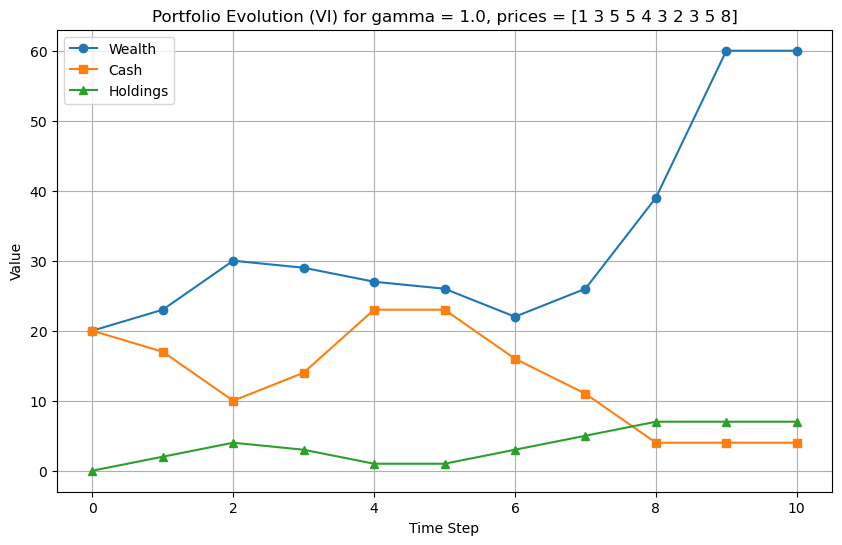

Execution time: for VI :: gamma : 1.0 :: 3.7356 seconds
Reward received with VI algorithm with gamma = 1.0 is 60
Using Deterministic transitions
discount factor used is :  0.999
Running for prices :  [1 3 5 5 4 3 2 3 5 8]
Route for VI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1080.0
delta : 0
The policy iteration took 2 iterations to converge
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 17, 2), best action u can take is Buy 2
At state : (2, 10, 4), best action u can take is Sell 1
At state : (3, 14, 3), best action u can take is Sell 2
At state : (4, 23, 1), best action u can take is Hold
At state : (5, 23, 1), best action u can take is Buy 2
At state : (6, 16, 3), best action u can take is Buy 2
At state : (7, 11, 5), best action u can take is Buy 2
At state : (8, 4, 7), best action u can take is Hold
At state : (9, 4, 7), best action u can take is Hold
At state : (10, 4, 7), best action u can take is Buy 

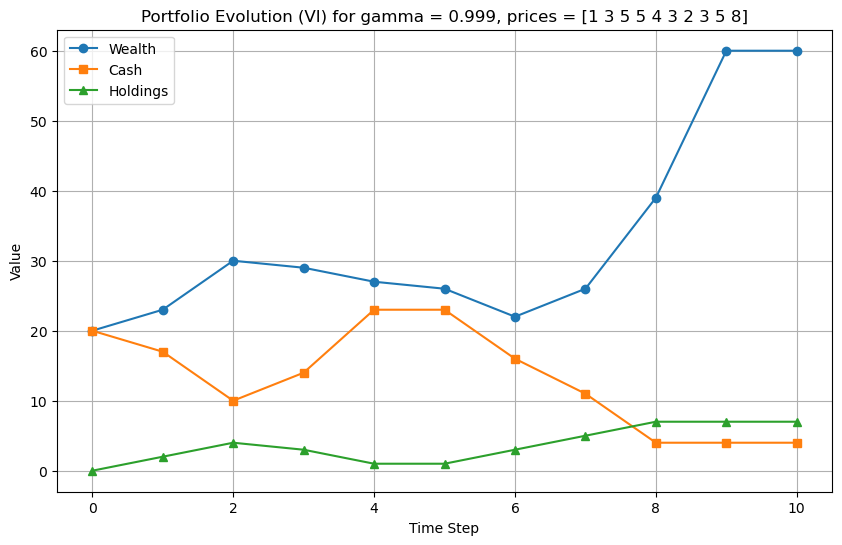

Execution time: for VI :: gamma : 0.999 :: 3.8024 seconds
Reward received with VI algorithm with gamma = 0.999 is 60
Using Deterministic transitions
discount factor used is :  1.0
Running for prices :  [2 2 2 4 2 2 4 2 2 2]
Route for VI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1020.0
delta : 0
The policy iteration took 2 iterations to converge
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 15, 2), best action u can take is Buy 2
At state : (2, 10, 4), best action u can take is Hold
At state : (3, 10, 4), best action u can take is Sell 2
At state : (4, 17, 2), best action u can take is Hold
At state : (5, 17, 2), best action u can take is Hold
At state : (6, 17, 2), best action u can take is Sell 2
At state : (7, 24, 0), best action u can take is Hold
At state : (8, 24, 0), best action u can take is Hold
At state : (9, 24, 0), best action u can take is Hold
At state : (10, 24, 0), best action u can take is Bu

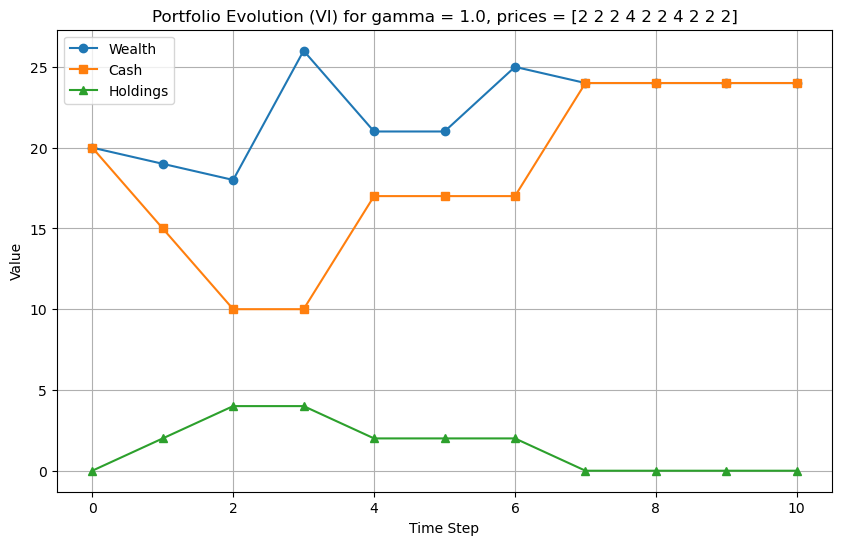

Execution time: for VI :: gamma : 1.0 :: 3.9224 seconds
Reward received with VI algorithm with gamma = 1.0 is 24
Using Deterministic transitions
discount factor used is :  0.999
Running for prices :  [2 2 2 4 2 2 4 2 2 2]
Route for VI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1020.0
delta : 0
The policy iteration took 2 iterations to converge
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 15, 2), best action u can take is Buy 2
At state : (2, 10, 4), best action u can take is Hold
At state : (3, 10, 4), best action u can take is Sell 2
At state : (4, 17, 2), best action u can take is Hold
At state : (5, 17, 2), best action u can take is Hold
At state : (6, 17, 2), best action u can take is Sell 2
At state : (7, 24, 0), best action u can take is Hold
At state : (8, 24, 0), best action u can take is Hold
At state : (9, 24, 0), best action u can take is Hold
At state : (10, 24, 0), best action u can take is Buy 

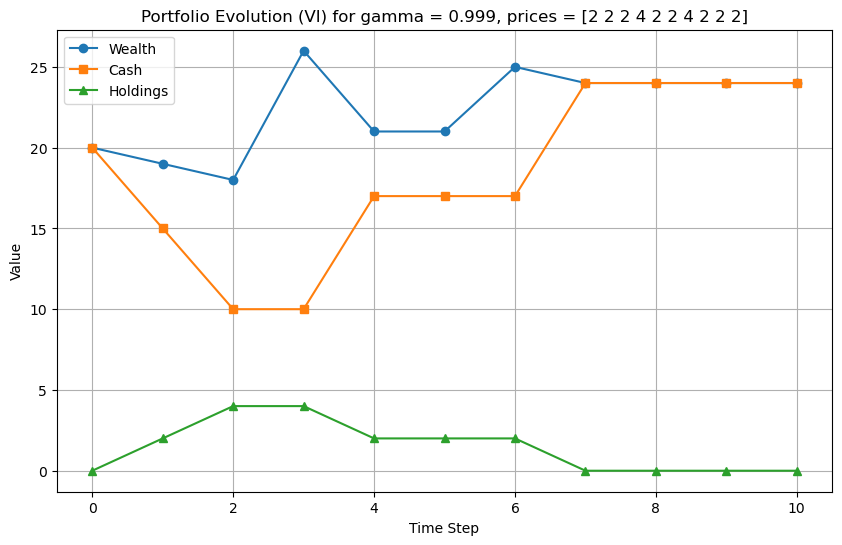

Execution time: for VI :: gamma : 0.999 :: 3.8574 seconds
Reward received with VI algorithm with gamma = 0.999 is 24
Using Deterministic transitions
discount factor used is :  1.0
Running for prices :  [4 1 4 1 4 4 4 1 1 4]
Route for VI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1040.0
delta : 0
The policy iteration took 2 iterations to converge
At state : (0, 20, 0), best action u can take is Hold
At state : (1, 20, 0), best action u can take is Buy 2
At state : (2, 17, 2), best action u can take is Hold
At state : (3, 17, 2), best action u can take is Buy 2
At state : (4, 14, 4), best action u can take is Hold
At state : (5, 14, 4), best action u can take is Hold
At state : (6, 14, 4), best action u can take is Hold
At state : (7, 14, 4), best action u can take is Buy 2
At state : (8, 11, 6), best action u can take is Buy 2
At state : (9, 8, 8), best action u can take is Hold
At state : (10, 8, 8), best action u can take is Buy 2


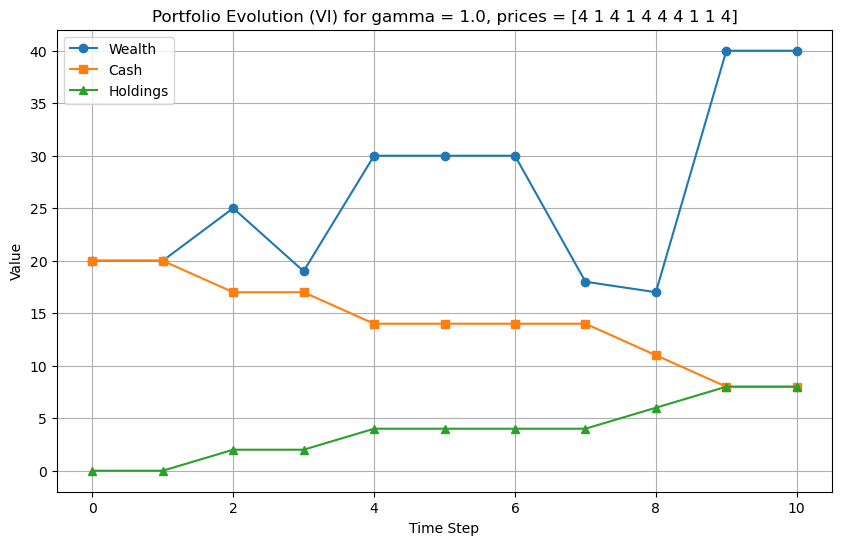

Execution time: for VI :: gamma : 1.0 :: 3.9523 seconds
Reward received with VI algorithm with gamma = 1.0 is 40
Using Deterministic transitions
discount factor used is :  0.999
Running for prices :  [4 1 4 1 4 4 4 1 1 4]
Route for VI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1040.0
delta : 0
The policy iteration took 2 iterations to converge
At state : (0, 20, 0), best action u can take is Hold
At state : (1, 20, 0), best action u can take is Buy 2
At state : (2, 17, 2), best action u can take is Hold
At state : (3, 17, 2), best action u can take is Buy 2
At state : (4, 14, 4), best action u can take is Hold
At state : (5, 14, 4), best action u can take is Hold
At state : (6, 14, 4), best action u can take is Hold
At state : (7, 14, 4), best action u can take is Buy 2
At state : (8, 11, 6), best action u can take is Buy 2
At state : (9, 8, 8), best action u can take is Hold
At state : (10, 8, 8), best action u can take is Buy 2
[V

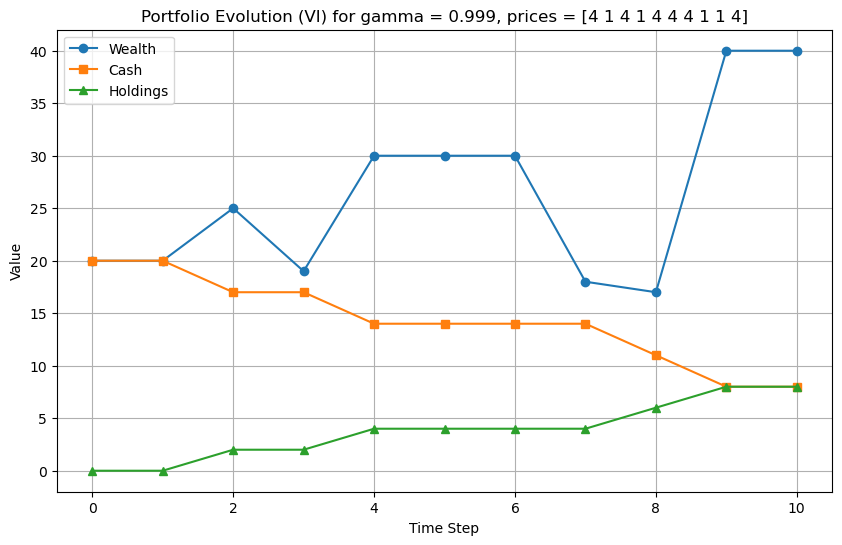

Execution time: for VI :: gamma : 0.999 :: 4.0413 seconds
Reward received with VI algorithm with gamma = 0.999 is 40


In [17]:
# 1 :: run only for value iteration algorithm
priceList = [
    [1, 3, 5, 5 , 4, 3, 2, 3, 5, 8],
    [2, 2, 2, 4 ,2, 2, 4, 2, 2, 2],
    [4, 1, 4, 1 ,4, 4, 4, 1, 1, 4]
]
gammas = [1.0 , 0.999]
   
for prices in priceList:
    for gamma in gammas: 
        run("VI", prices = prices, gamma = gamma)

Using Deterministic transitions
discount factor used is :  1.0
Running for prices :  [1 3 5 5 4 3 2 3 5 8]
Route for PI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1080.0
delta : 0
Errors in policy : 100721
delta : 41.0
delta : 0
Errors in policy : 28855
delta : 23.0
delta : 0
Errors in policy : 26911
delta : 17.0
delta : 0
Errors in policy : 6057
delta : 14.0
delta : 0
Errors in policy : 13
delta : 7.0
delta : 0
Errors in policy : 0
The policy iteration took 6 iterations to converge
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 17, 2), best action u can take is Buy 2
At state : (2, 10, 4), best action u can take is Sell 1
At state : (3, 14, 3), best action u can take is Sell 2
At state : (4, 23, 1), best action u can take is Hold
At state : (5, 23, 1), best action u can take is Buy 2
At state : (6, 16, 3), best action u can take is Buy 2
At state : (7, 11, 5), best action u can take is Buy 2
At state : (8, 4,

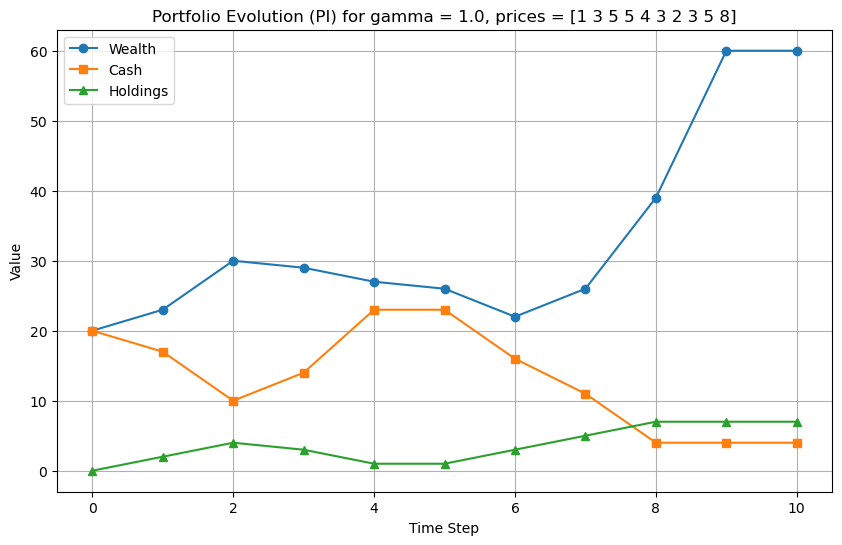

Execution time: for PI :: gamma : 1.0 :: 18.9864 seconds
Reward received with PI algorithm with gamma = 1.0 is 60
Using Deterministic transitions
discount factor used is :  0.999
Running for prices :  [1 3 5 5 4 3 2 3 5 8]
Route for PI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1080.0
delta : 0
Errors in policy : 100721
delta : 40.754614180615135
delta : 0
Errors in policy : 28855
delta : 22.816642713608722
delta : 0
Errors in policy : 26911
delta : 16.864475049189068
delta : 0
Errors in policy : 6057
delta : 13.874502825762242
delta : 0
Errors in policy : 13
delta : 6.930314161468225
delta : 0
Errors in policy : 0
The policy iteration took 6 iterations to converge
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 17, 2), best action u can take is Buy 2
At state : (2, 10, 4), best action u can take is Sell 1
At state : (3, 14, 3), best action u can take is Sell 2
At state : (4, 23, 1), best action u can take is H

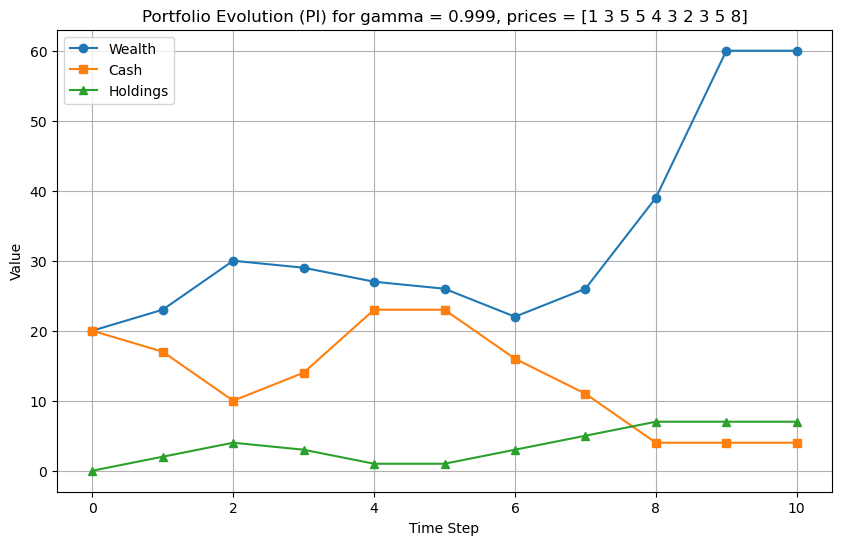

Execution time: for PI :: gamma : 0.999 :: 18.8173 seconds
Reward received with PI algorithm with gamma = 0.999 is 60
Using Deterministic transitions
discount factor used is :  1.0
Running for prices :  [2 2 2 4 2 2 4 2 2 2]
Route for PI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1020.0
delta : 0
Errors in policy : 31061
delta : 6.0
delta : 0
Errors in policy : 19379
delta : 4.0
delta : 0
Errors in policy : 3048
delta : 2.0
delta : 0
Errors in policy : 17
delta : 1.0
delta : 0
Errors in policy : 15
delta : 1.0
delta : 0
Errors in policy : 6
delta : 1.0
delta : 0
Errors in policy : 0
The policy iteration took 7 iterations to converge
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 15, 2), best action u can take is Buy 2
At state : (2, 10, 4), best action u can take is Hold
At state : (3, 10, 4), best action u can take is Sell 2
At state : (4, 17, 2), best action u can take is Hold
At state : (5, 17, 2), best act

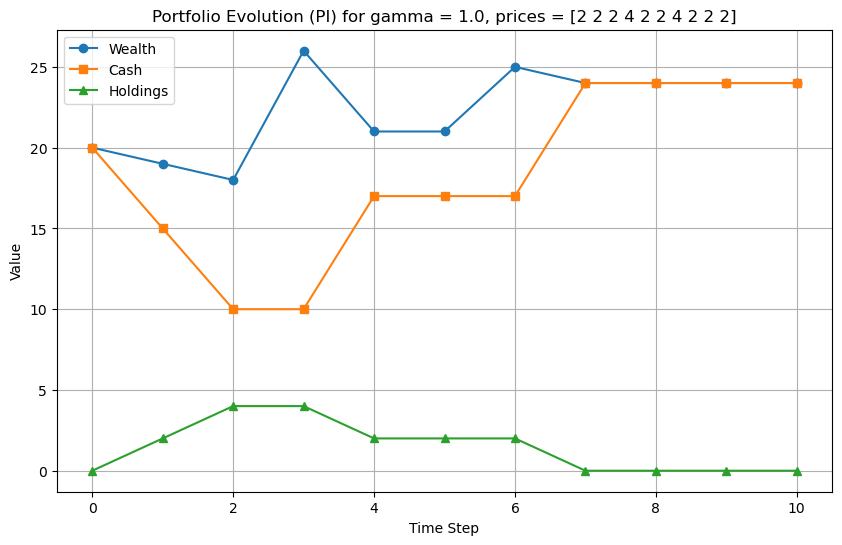

Execution time: for PI :: gamma : 1.0 :: 25.3304 seconds
Reward received with PI algorithm with gamma = 1.0 is 24
Using Deterministic transitions
discount factor used is :  0.999
Running for prices :  [2 2 2 4 2 2 4 2 2 2]
Route for PI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1020.0
delta : 0
Errors in policy : 31061
delta : 5.958125790210147
delta : 0
Errors in policy : 19379
delta : 3.9641436645040358
delta : 0
Errors in policy : 3048
delta : 1.9860419300702006
delta : 0
Errors in policy : 17
delta : 0.9930209650349298
delta : 0
Errors in policy : 15
delta : 0.9910359161258775
delta : 0
Errors in policy : 6
delta : 0.9900448802097515
delta : 0
Errors in policy : 0
The policy iteration took 7 iterations to converge
At state : (0, 20, 0), best action u can take is Buy 2
At state : (1, 15, 2), best action u can take is Buy 2
At state : (2, 10, 4), best action u can take is Hold
At state : (3, 10, 4), best action u can take is Sell 

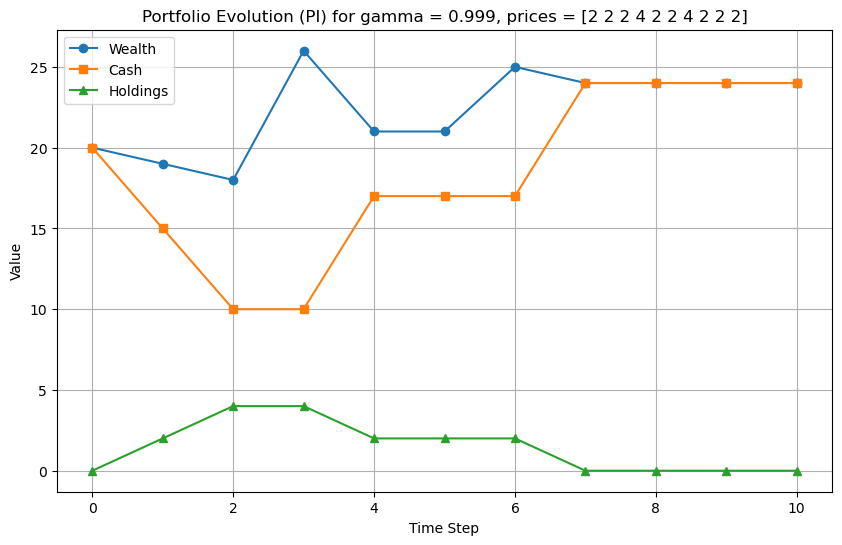

Execution time: for PI :: gamma : 0.999 :: 22.8118 seconds
Reward received with PI algorithm with gamma = 0.999 is 24
Using Deterministic transitions
discount factor used is :  1.0
Running for prices :  [4 1 4 1 4 4 4 1 1 4]
Route for PI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1040.0
delta : 0
Errors in policy : 51041
delta : 20.0
delta : 0
Errors in policy : 26090
delta : 18.0
delta : 0
Errors in policy : 19089
delta : 1.0
delta : 0
Errors in policy : 8
delta : 1.0
delta : 0
Errors in policy : 3
delta : 1.0
delta : 0
Errors in policy : 5
delta : 1.0
delta : 0
Errors in policy : 0
The policy iteration took 7 iterations to converge
At state : (0, 20, 0), best action u can take is Hold
At state : (1, 20, 0), best action u can take is Buy 2
At state : (2, 17, 2), best action u can take is Hold
At state : (3, 17, 2), best action u can take is Buy 2
At state : (4, 14, 4), best action u can take is Hold
At state : (5, 14, 4), best acti

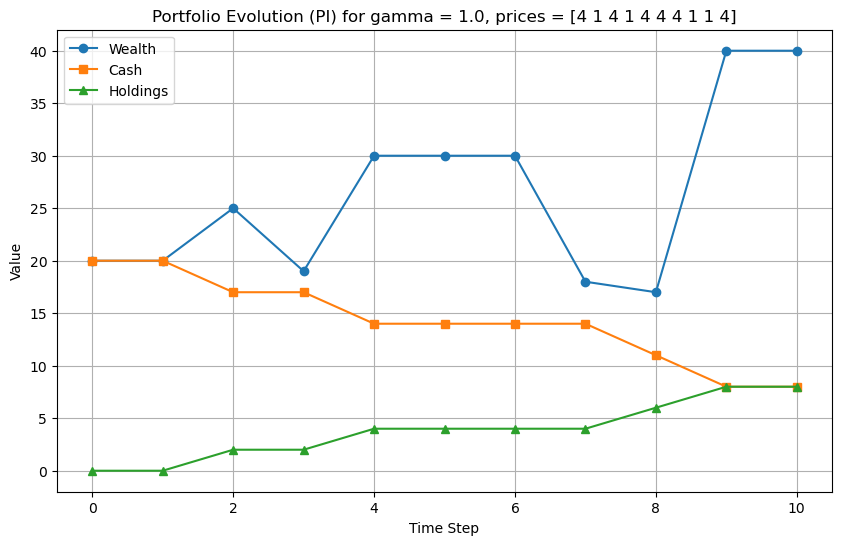

Execution time: for PI :: gamma : 1.0 :: 21.1973 seconds
Reward received with PI algorithm with gamma = 1.0 is 40
Using Deterministic transitions
discount factor used is :  0.999
Running for prices :  [4 1 4 1 4 4 4 1 1 4]
Route for PI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1040.0
delta : 0
Errors in policy : 51041
delta : 19.82071832251779
delta : 0
Errors in policy : 26090
delta : 17.820807843775473
delta : 0
Errors in policy : 19089
delta : 0.9950099900047462
delta : 0
Errors in policy : 8
delta : 0.9940149800147537
delta : 0
Errors in policy : 3
delta : 0.9920279440696049
delta : 0
Errors in policy : 5
delta : 0.9900448802095525
delta : 0
Errors in policy : 0
The policy iteration took 7 iterations to converge
At state : (0, 20, 0), best action u can take is Hold
At state : (1, 20, 0), best action u can take is Buy 2
At state : (2, 17, 2), best action u can take is Hold
At state : (3, 17, 2), best action u can take is Buy 2
A

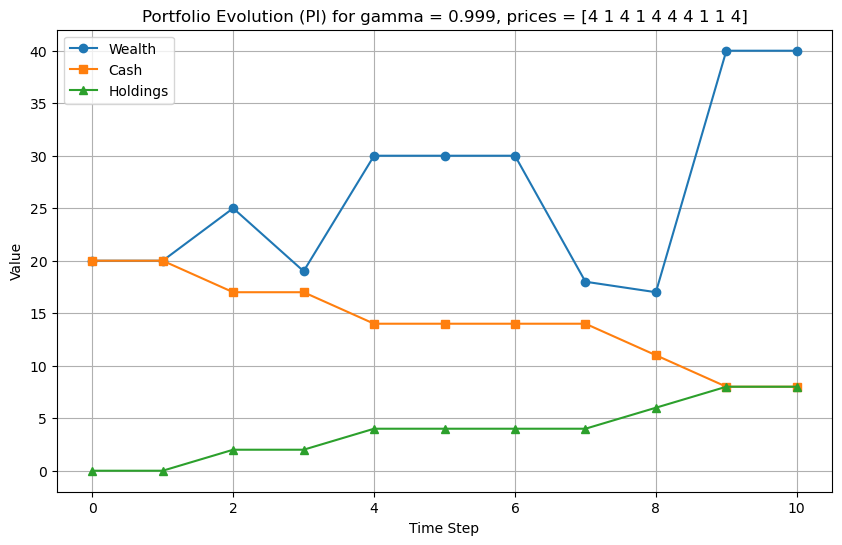

Execution time: for PI :: gamma : 0.999 :: 21.8158 seconds
Reward received with PI algorithm with gamma = 0.999 is 40


In [18]:
# 2 :: run only for policy iteration algorithm
priceList = [
    [1, 3, 5, 5 , 4, 3, 2, 3, 5, 8],
    [2, 2, 2, 4 ,2, 2, 4, 2, 2, 2],
    [4, 1, 4, 1 ,4, 4, 4, 1, 1, 4]
]
gammas = [1.0 , 0.999]
   
for prices in priceList:
    for gamma in gammas: 
        run("PI", prices = prices, gamma = gamma)

In [11]:
def plotErrorLogs(errorLogs, prices, gamma, variance):
    plt.figure(figsize=(8,5))
    plt.plot(range(len(errorLogs)), errorLogs, marker="o")
    plt.xlabel("Iteration (time step)")
    plt.ylabel("Max value difference")
    plt.title(f"Max value difference vs Iteration for Policy Iteration for gamma = {gamma}, variance = {variance} and prices = {prices}")
    plt.grid(True)
    plt.show()

Asset prices not found. Using default prices. Please check your arguments!
Setting price variance to 1
discount factor used is :  1.0
Running for prices :  [4 0 3 5 5 7 7 6 5 4]
Route for PI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1040.0
delta : 0
Errors in policy : 87658
delta : 23.0
delta : 0
Errors in policy : 31111
delta : 15.0
delta : 0
Errors in policy : 5071
delta : 3.0
delta : 0
Errors in policy : 15
delta : 1.0
delta : 0
Errors in policy : 0
The policy iteration took 5 iterations to converge


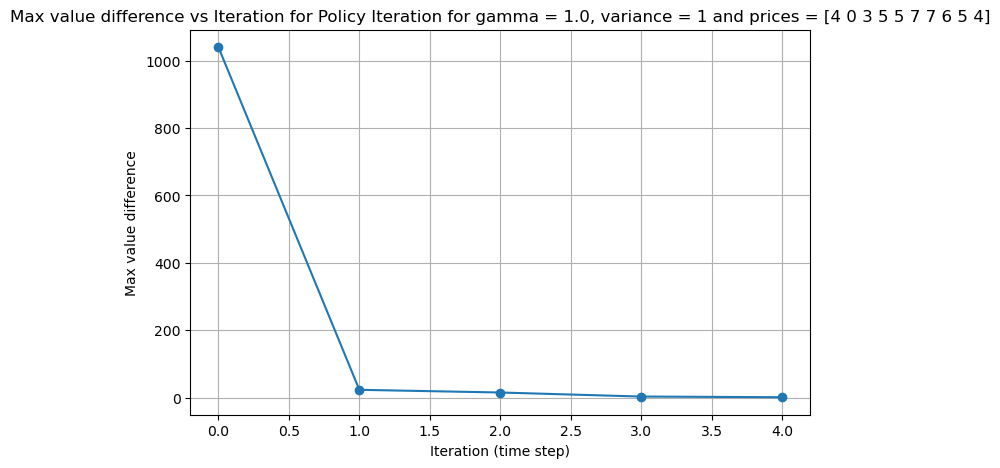

discount factor used is :  1.0
Running for prices :  [4 0 3 5 5 7 7 6 5 4]
Route for PI
Maxm price one can hold : 1000
Start evaluating policies...policy_size :  (11, 1001, 11)
delta : 1040.0
delta : 0
Errors in policy : 87658
delta : 23.0
delta : 0
Errors in policy : 31111
delta : 15.0
delta : 0
Errors in policy : 5071
delta : 3.0
delta : 0
Errors in policy : 15
delta : 1.0
delta : 0
Errors in policy : 0
The policy iteration took 5 iterations to converge


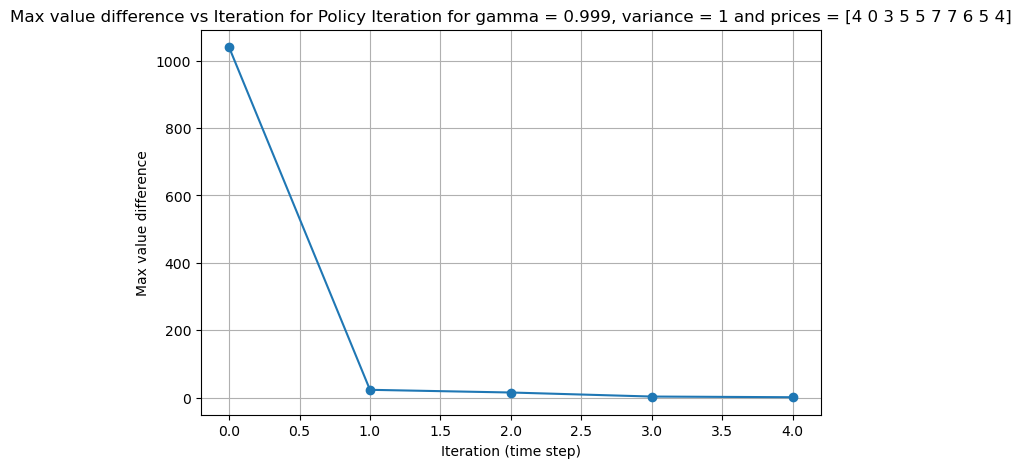

In [13]:
# 3 :: run Policy Iteration with variance = 1 and threshold = 1e-2 and see it converges
# plot the maximum value difference vs iteration count for policy iteration
def runpolicyAndPlot(env, variance = 1, threshold = 1e-2, gamma = 1.0):
    model = PortFolioModel(env, gamma = 1.0)
    print("discount factor used is : ", model.discount_factor)
    print("Running for prices : ", model.prices)
    print("Route for PI")
    
    policyIterationOnPortfolioOptimization = PolicyIterationOnPortfolioOptimization(model, epsilon = threshold)
    optimalPolicyPI, optimalValuefnPI = policyIterationOnPortfolioOptimization.run_policy_iteration(logDelta = True)
    
    # plot the policyIterationOnPortfolioOptimization.errorLogs against time
    plotErrorLogs(policyIterationOnPortfolioOptimization.errorLogs, model.prices, gamma, variance)

# run for variance = 1
env = DiscretePortfolioOptEnv(variance=1)
# running for gamma = 1.0
runpolicyAndPlot(env, variance = 1, threshold = 1e-2, gamma = 1.0)

# running for gamma = 0.9
runpolicyAndPlot(env, variance = 1, threshold = 1e-2, gamma = 0.999)